# **Gradient Descent**

In this Jupyter Notebook, we demonstrate the implementation of Gradient Descent for linear regression using Python. We will explore both simple and multiple linear regression models and utilize various approaches including analytical solutions, gradient descent optimization, and built-in functions from libraries such as `scipy` and `scikit-learn`. The `tips` dataset from Seaborn will be used.

***

## **1. Import Libraries**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Configure matplotlib for inline display
%matplotlib inline

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

***

## **2. Linear Regression Example**

### **1.1 ~ Loading and Visualizing the Dataset**

We begin by loading the `tips` dataset and visualizing the relationship between the total bill and the tip.

In [2]:
# Load the 'tips' dataset from Seaborn
tips = sns.load_dataset("tips")

# Display the first few rows of the dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


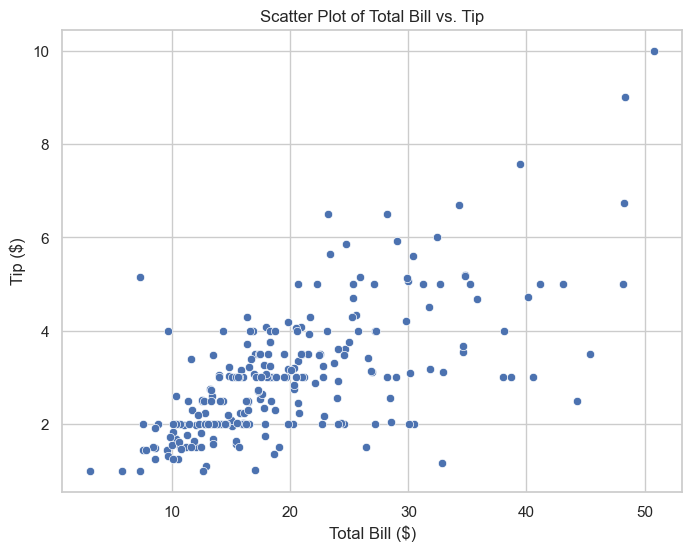

In [3]:
# Scatter plot of total bill vs. tip
plt.figure(figsize=(8,6))
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.show()

### **2.2 ~ Initial Guess for the Regression Parameter**

We start with an initial guess for the slope (`gamma`) and visualize the corresponding regression line.

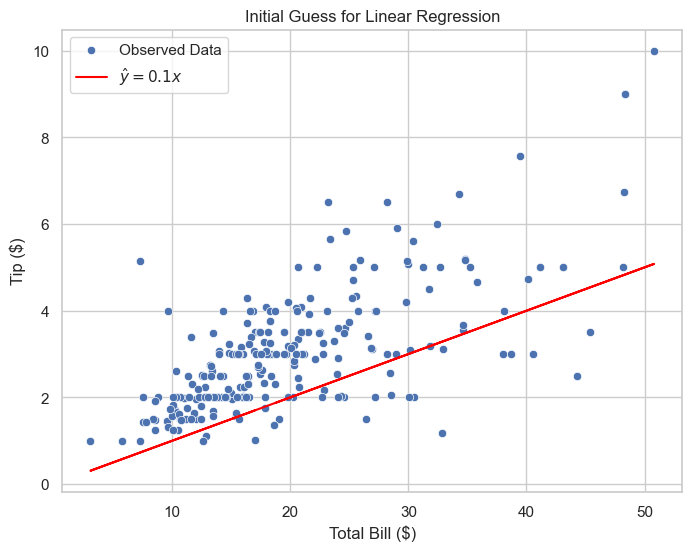

In [4]:
# Initial guess for gamma
gamma_initial = 0.1

# Compute predicted tips based on initial gamma
y_hat_initial = gamma_initial * tips["total_bill"]

# Plotting the data and the initial regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x="total_bill", y="tip", data=tips, label='Observed Data')
plt.plot(tips["total_bill"], y_hat_initial, color='red', label=r'$\hat{y} = 0.1x$')
plt.title("Initial Guess for Linear Regression")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend()
plt.show()

### **2.3 ~ Mean Squared Error (MSE) Loss Function**

We define the Mean Squared Error (MSE) loss function to evaluate the performance of our regression model.

In [5]:
def mse_loss(gamma, x, y_obs):
    """
    Computes the Mean Squared Error (MSE) for a given gamma.

    Parameters:
    - gamma: float, the slope parameter
    - x: array-like, independent variable
    - y_obs: array-like, observed dependent variable

    Returns:
    - float, MSE value
    """
    y_hat = gamma * x
    return np.mean((y_hat - y_obs) ** 2)

In [6]:
# Calculate MSE for the initial guess
mse_initial = mse_loss(gamma_initial, tips["total_bill"], tips["tip"])
print(f"Initial MSE (gamma = {gamma_initial}): {mse_initial:.4f}")

Initial MSE (gamma = 0.1): 2.0778


### **2.4 ~ Objective**

Our goal is to find the optimal `gamma` ($\hat{\gamma}$) that minimizes the MSE.

### ***Approach 1: Analytical Solution Using Calculus***

By taking the derivative of the MSE with respect to `gamma` and setting it to zero, we derive the optimal `gamma`.

$$
\hat{\gamma} = \frac{\sum(x_i y_i)}{\sum(x_i^2)}
$$

In [7]:
# Analytical solution for optimal gamma
gamma_analytical = np.sum(tips["tip"] * tips["total_bill"]) / np.sum(tips["total_bill"] ** 2)
print(f"Analytical solution for gamma: {gamma_analytical:.4f}")

Analytical solution for gamma: 0.1437


In [8]:
# Compute MSE using the analytical gamma
mse_analytical = mse_loss(gamma_analytical, tips["total_bill"], tips["tip"])
print(f"MSE with analytical gamma: {mse_analytical:.4f}")

MSE with analytical gamma: 1.1781


### ***Approach 2: Gradient Descent***

We implement Gradient Descent to iteratively find the optimal `gamma` that minimizes the MSE.

#### *Defining the Gradient Descent Function*

In [9]:
def gradient_descent(df_derivative, initial_guess, alpha, iterations):
    """
    Performs Gradient Descent to minimize a function.

    Parameters:
    - df_derivative: function, derivative of the loss function
    - initial_guess: float, starting value for gamma
    - alpha: float, learning rate
    - iterations: int, number of iterations

    Returns:
    - np.array, history of gamma values
    """
    guesses = [initial_guess]
    gamma = initial_guess
    for _ in range(iterations):
        gradient = df_derivative(gamma)
        gamma = gamma - alpha * gradient
        guesses.append(gamma)
    return np.array(guesses)

#### *Defining the Derivative of the MSE Loss Function*

In [10]:
def mse_loss_derivative(gamma):
    """
    Computes the derivative of the MSE loss with respect to gamma.

    Parameters:
    - gamma: float, the slope parameter

    Returns:
    - float, derivative of MSE
    """
    x = tips["total_bill"]
    y_obs = tips["tip"]
    y_hat = gamma * x
    return np.mean(2 * (y_hat - y_obs) * x)

#### *Running Gradient Descent*

In [11]:
# Parameters for Gradient Descent
initial_gamma = 0.1
learning_rate = 0.001
num_iterations = 50

# Perform Gradient Descent
gamma_history = gradient_descent(mse_loss_derivative, initial_gamma, learning_rate, num_iterations)

# Display the final gamma value
print(f"Gamma after Gradient Descent: {gamma_history[-1]:.4f}")

Gamma after Gradient Descent: 0.1437


#### *Plotting the Convergence of Gamma*

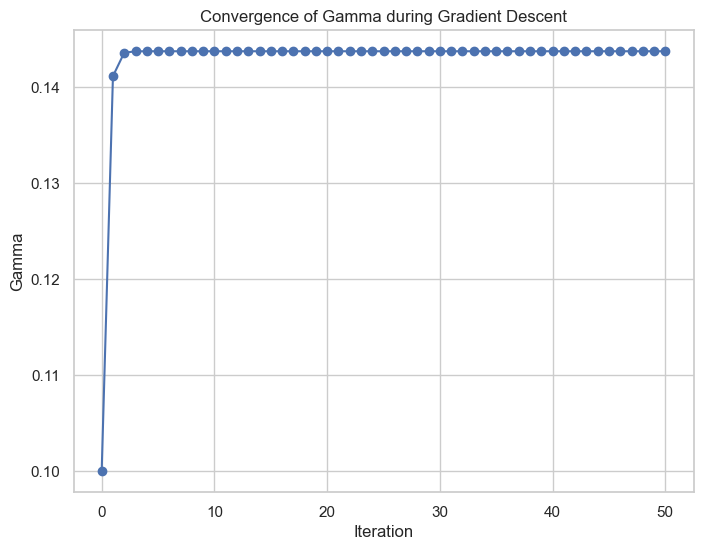

In [12]:
# Plot the convergence of gamma values
plt.figure(figsize=(8,6))
plt.plot(range(len(gamma_history)), gamma_history, marker='o')
plt.title("Convergence of Gamma during Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Gamma")
plt.grid(True)
plt.show()

### ***Approach 3: Using `scipy.optimize.minimize`***

We utilize the `minimize` function from `scipy.optimize` to find the optimal `gamma`.

In [13]:
# Define the objective function for scipy.optimize.minimize
def objective(gamma):
    return mse_loss(gamma, tips["total_bill"], tips["tip"])

# Perform minimization
result = minimize(objective, x0=0)
gamma_scipy = result.x[0]
print(f"Gamma from scipy.optimize.minimize: {gamma_scipy:.4f}")
print(f"Optimization success: {result.success}, Message: {result.message}")

Gamma from scipy.optimize.minimize: 0.1437
Optimization success: True, Message: Optimization terminated successfully.


### ***Approach 4: Using `sklearn.linear_model.LinearRegression`***

We employ `LinearRegression` from `scikit-learn` to fit the model.

In [14]:
# Initialize and fit the Linear Regression model without intercept
model = LinearRegression(fit_intercept=False)
X = tips[["total_bill"]]
y = tips["tip"]
model.fit(X, y)
gamma_sklearn = model.coef_[0]
print(f"Gamma from sklearn LinearRegression: {gamma_sklearn:.4f}")

Gamma from sklearn LinearRegression: 0.1437


In [15]:
# Compute MSE using sklearn's gamma
mse_sklearn = mse_loss(gamma_sklearn, tips["total_bill"], tips["tip"])
print(f"MSE with sklearn gamma: {mse_sklearn:.4f}")

MSE with sklearn gamma: 1.1781


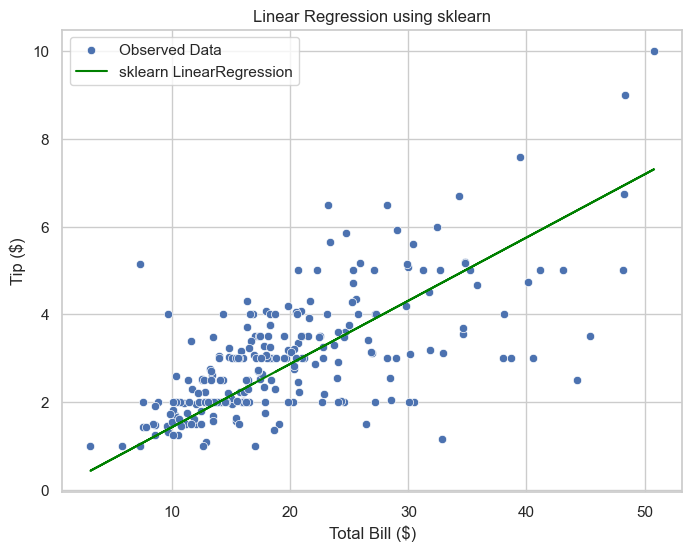

In [16]:
# Plotting the data and the regression line from sklearn
plt.figure(figsize=(8,6))
sns.scatterplot(x="total_bill", y="tip", data=tips, label='Observed Data')
y_hat_sklearn = gamma_sklearn * tips["total_bill"]
plt.plot(tips["total_bill"], y_hat_sklearn, color='green', label='sklearn LinearRegression')
plt.title("Linear Regression using sklearn")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend()
plt.show()

***

## **3. Multi-Dimensional Models**

### **3.1 ~ Extending to Multiple Linear Regression**

We extend our model to include a constant bias term, allowing us to fit an intercept.

$$
\text{tip} = \hat{\theta}_0 + \hat{\theta}_1 \times \text{total\_bill}
$$

#### *Preparing the Design Matrix*

In [17]:
# Create a copy of the dataset and add a bias column
tips_with_bias = tips.copy()
tips_with_bias["bias"] = 1

# Define the design matrix X with 'total_bill' and 'bias'
X = tips_with_bias[["total_bill", "bias"]]
X.head()

,total_bill,bias
0,16.99,1
1,10.34,1
2,21.01,1
3,23.68,1
4,24.59,1


#### *Making Predictions*

In [18]:
# Define theta parameters: 5% of total_bill plus a $1.50 bias
theta = np.array([0.05, 1.50])

# Compute predicted tips
y_predicted = X @ theta
y_predicted

0      2.3495
1      2.0170
2      2.5505
3      2.6840
4      2.7295
        ...  
239    2.9515
240    2.8590
241    2.6335
242    2.3910
243    2.4390
Length: 244, dtype: float64

#### *Defining the MSE Loss Function for Multiple Parameters*

In [19]:
def mse_loss_multi(theta, X, y_obs):
    """
    Computes the Mean Squared Error (MSE) for multiple parameters.

    Parameters:
    - theta: array-like, parameters [theta0, theta1]
    - X: DataFrame, design matrix
    - y_obs: array-like, observed dependent variable

    Returns:
    - float, MSE value
    """
    y_hat = X @ theta
    return np.mean((y_hat - y_obs) ** 2)

In [20]:
# Calculate MSE for the defined theta
mse_multi = mse_loss_multi(theta, X, tips["tip"])
print(f"MSE with theta [0.05, 1.50]: {mse_multi:.4f}")

MSE with theta [0.05, 1.50]: 1.5341


### ***Approach 1: Gradient Descent for Multiple Parameters***

We adapt the Gradient Descent method to handle multiple parameters.

#### *Defining the Gradient for Multiple Parameters*

In [21]:
def mse_gradient(theta, X, y_obs):
    """
    Computes the gradient of the MSE loss with respect to theta.

    Parameters:
    - theta: array-like, parameters [theta0, theta1]
    - X: DataFrame, design matrix
    - y_obs: array-like, observed dependent variable

    Returns:
    - np.array, gradient vector
    """
    y_hat = X @ theta
    error = y_hat - y_obs
    gradient = (2 / len(y_obs)) * X.T @ error
    return gradient

#### *Updating the Gradient Descent Function for Multiple Parameters*

In [22]:
def gradient_descent_multi(gradient_func, initial_theta, alpha, iterations, X, y):
    """
    Performs Gradient Descent for multiple parameters.

    Parameters:
    - gradient_func: function, computes gradient
    - initial_theta: array-like, starting parameters
    - alpha: float, learning rate
    - iterations: int, number of iterations
    - X: DataFrame, design matrix
    - y: array-like, observed dependent variable

    Returns:
    - np.array, history of theta values
    """
    theta_history = [initial_theta]
    theta = initial_theta
    for _ in range(iterations):
        grad = gradient_func(theta, X, y)
        theta = theta - alpha * grad
        theta_history.append(theta)
    return np.array(theta_history)

#### *Running Gradient Descent for Multiple Parameters*

In [23]:
# Parameters for Gradient Descent
initial_theta = np.array([0.0, 0.0])
learning_rate = 0.001
num_iterations = 20

# Perform Gradient Descent
theta_history = gradient_descent_multi(mse_gradient, initial_theta, learning_rate, num_iterations, X, tips["tip"])

# Display the final theta values
print(f"Theta after Gradient Descent: {theta_history[-1]}")

Theta after Gradient Descent: [0.14323475 0.01214303]


### ***Approach 2: Using `scipy.optimize.minimize` for Multiple Parameters***

We use `minimize` to find the optimal parameters in a multi-dimensional setting.

In [24]:
# Define the objective function for scipy.optimize.minimize
def objective_multi(theta):
    return mse_loss_multi(theta, X, tips["tip"])

# Perform minimization
result_multi = minimize(objective_multi, x0=[0, 0])
theta_scipy = result_multi.x
print(f"Theta from scipy.optimize.minimize: {theta_scipy}")
print(f"Optimization success: {result_multi.success}, Message: {result_multi.message}")

Theta from scipy.optimize.minimize: [0.10502447 0.92027047]
Optimization success: True, Message: Optimization terminated successfully.


### ***Approach 3: Using `sklearn.linear_model.LinearRegression` for Multiple Parameters***

We leverage `LinearRegression` to fit the model with multiple parameters.

In [25]:
# Initialize and fit the Linear Regression model without intercept
model_multi = LinearRegression(fit_intercept=False)
model_multi.fit(X, tips["tip"])
theta_sklearn = model_multi.coef_
print(f"Theta from sklearn LinearRegression: {theta_sklearn}")

Theta from sklearn LinearRegression: [0.10502452 0.92026961]


In [26]:
# Initialize and fit the Linear Regression model with intercept
model_with_intercept = LinearRegression()
X_single = tips[["total_bill"]]
model_with_intercept.fit(X_single, tips["tip"])
gamma_sklearn_intercept = model_with_intercept.coef_[0]
intercept_sklearn = model_with_intercept.intercept_
print(f"Theta from sklearn with intercept: {gamma_sklearn_intercept}, Intercept: {intercept_sklearn}")

Theta from sklearn with intercept: 0.10502451738435337, Intercept: 0.9202696135546731


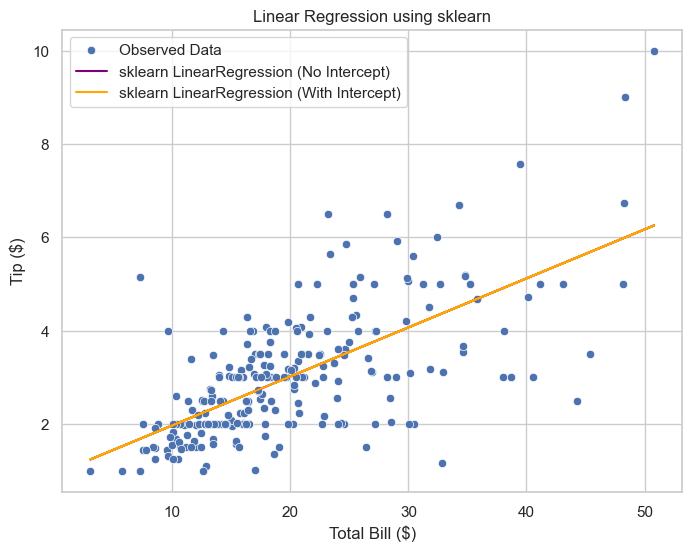

In [27]:
# Plotting the data and the regression lines from sklearn
plt.figure(figsize=(8,6))
sns.scatterplot(x="total_bill", y="tip", data=tips, label='Observed Data')

# Regression line without intercept
y_hat_sklearn_multi = X @ theta_sklearn
plt.plot(tips["total_bill"], y_hat_sklearn_multi, color='purple', label='sklearn LinearRegression (No Intercept)')

# Regression line with intercept
y_hat_sklearn_intercept = intercept_sklearn + gamma_sklearn_intercept * tips["total_bill"]
plt.plot(tips["total_bill"], y_hat_sklearn_intercept, color='orange', label='sklearn LinearRegression (With Intercept)')

plt.title("Linear Regression using sklearn")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend()
plt.show()